In [1]:
import pandas as pd

# 加载 Excel 文件
excel_path = './data/beiyou_excel/chaoyang_retrospective_233.xlsx'
labels_df = pd.read_excel(excel_path)

# 查看标签数据框架
print(labels_df.head())

            姓名  是否＞45  年龄  神经侵犯与否  脉管癌栓与否  是否＞2cm  T分期  N分期  TNM分期  淋巴结转移数  \
0    BAILIANDI      1  63     0.0     1.0     1.0  2.0  1.0    2.0     1.0   
1      BAOAHUA      1  83     0.0     1.0     0.0  1.0  0.0    1.0     0.0   
2    BAOYINHUA      0  44     0.0     1.0     1.0  2.0  3.0    3.0    24.0   
3     BAOYUGUI      1  61     0.0     1.0     0.0  1.0  0.0    1.0     0.0   
4  BIANCHUNLAN      1  62     0.0     0.0     1.0  2.0  0.0    2.0     0.0   

   ER  PR  HR  HER2  KI67分级  分子分型  
0   1   1   1     2       1     1  
1   1   1   1     2       1     1  
2   1   1   1     1       3     3  
3   1   1   1     2       2     2  
4   1   2   1     1       2     3  


[[7.52316385e-37 2.73851167e-11 8.76272999e-10 ... 8.58043600e-03
  7.75647024e-03 6.99705537e-03]
 [2.52238331e-14 2.09302908e-10 4.36030145e-09 ... 9.24939755e-03
  8.37390125e-03 7.56600406e-03]
 [2.73851167e-11 8.76272999e-10 6.69743461e-09 ... 9.95944720e-03
  9.03004594e-03 8.17136839e-03]
 ...
 [2.48705205e-02 2.69456599e-02 2.91570425e-02 ... 3.64725388e-08
  9.41982403e-09 1.46319767e-09]
 [2.33867001e-02 2.53629796e-02 2.74706595e-02 ... 1.35625005e-08
  2.46272469e-09 1.81132789e-10]
 [2.19745766e-02 2.38555707e-02 2.58632246e-02 ... 3.94634192e-09
  3.91502303e-10 4.68052593e-12]]


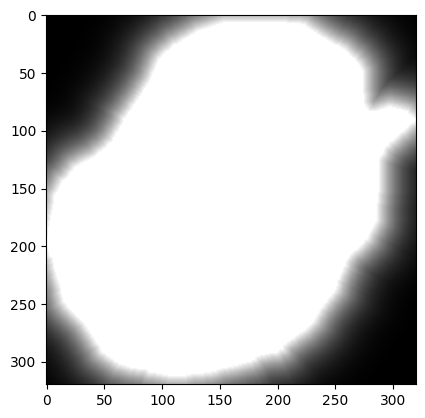

In [ ]:
import os
import importlib
import module.load_img

importlib.reload(module.load_img)

from module.load_img import load_dcm, load_nii 

# dir = "./data/chaoyang_huigu/BAILIANDI RCC"
dir = "./data/chaoyang_huigu/BAILIANDI RMLO"

# img_nib ,_,_= load_nii(os.path.join(dir, "1.nii.gz"))
img_nib,_,_= load_nii(os.path.join(dir, "1.nii.gz"))
# print(img_nib.shape)
print(img_nib)
# #查看img_nib中最大值，以及他的位置
# print(np.max(img_nib))
# print(np.where(img_nib == np.max(img_nib)))

# img_dcm = pydicom.dcmread(os.path.join(dir, "ser97311img00002.dcm"))
img_dcm = load_dcm(os.path.join(dir, "ser97311img00001.dcm"))
# print(img_dcm.shape)
# print(img_dcm)

# # 查看 DICOM 图像
import matplotlib.pyplot as plt

plt.imshow(img_dcm, cmap='gray')
# plt.savefig("./image/test20.png")

# plt.imshow(img_nib, cmap='gray')




In [11]:
import os
import glob

# # 获取当前文件夹中的所有.txt文件
# txt_files = glob.glob("./image/*.png")

# # 删除每个.txt文件
# for file in txt_files:
#     os.remove(file)
#     print(f"{file} 已删除")

# #获取文件夹中所有的.pth文件
# pth_files = glob.glob("./model_save/*.pth")

# for file in pth_files:
#     os.remove(file)
#     print(f"{file} 已删除")


d:\Code\mg\mam_gland\myenv\lib\site-packages\pydicom\charset.py:754: UserWarning: Unknown encoding 'ISO 2022 IR 165' - using default encoding instead
  _warn_about_invalid_encoding(encoding)


KeyboardInterrupt: 

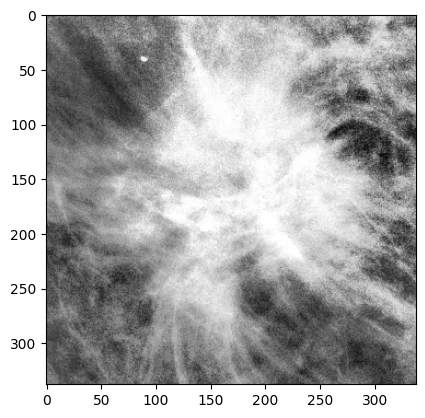

In [27]:
import pandas as pd
import os
from module.load_img import load_dcm, load_nii
import numpy as np
from PIL import Image
import cv2

def process_images_for_patients(base_path, target_size,a =0):

    # 获取所有病人文件夹
    all_folders = sorted([f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))])

    # 按病人分组文件夹，每两个文件夹为一个病人
    patient_folders = []
    for i in range(0, len(all_folders), 2):
        
        if i + 1 < len(all_folders):
            patient_folders.append([all_folders[i], all_folders[i + 1]])

    # print(len(patient_folders))

    # for _, row in labels_df.iterrows():
    #     label = row['N分期']  # 获取病人标签（N分期）
        
    # 加载每个文件夹中的图像
    patient_images = []

    for folder_pair in patient_folders:

        all_images = []
        for folder in folder_pair:
            a += 1

            dcm_file = None
            nii_file = None

            # print(folder)

            # 查找对应的 .dcm 和 .nii 文件
            for file in os.listdir(os.path.join(base_path, folder)):
                if file.endswith('.dcm'):
                    dcm_file = os.path.join(base_path, folder, file)
                elif file.endswith('.nii.gz'):
                    nii_file = os.path.join(base_path, folder, file)
                           
            # print(f"dcm_file: {dcm_file}, nii_file: {nii_file}")

            if dcm_file and nii_file:
                # 读取并处理 .dcm 和 .nii 图像
                dcm_image = load_dcm(dcm_file)
                nii_mask , top_left, bottom_right = load_nii(nii_file)
                dcm_image = dcm_image[top_left[0]:bottom_right[0], top_left[1]:bottom_right[1]]

                # 将两个图像相乘
                focused_image = dcm_image * nii_mask
                focused_image = cv2.resize(focused_image, target_size)               
                npimage = np.array(focused_image)
                # np.savetxt(npimage,f'./txt/{a}.txt')
                # print(npimage)
                # np.savetxt(f"./txt/{a}.txt", npimage, fmt="%.1f", delimiter=",")

                plt.imshow(dcm_image, cmap='gray')
                # plt.imshow(focused_image, cmap='gray')
                plt.savefig(f"./image/curr{a}.png")
                
                all_images.append(focused_image)

            else:
                dcm_image = load_dcm(dcm_file)
                dcm_image = cv2.resize(dcm_image, target_size)
                all_images.append(dcm_image)
                        
        if len(all_images) == 2:  # 确保每个病人有 2 张图像

            # print(all_images[0].shape)
            # 将两个图像堆叠在一起
            patient_input = np.stack(all_images, axis=0)  # 形状为 (2, 512, 512)
            # 追加至列表中
            patient_images.append(patient_input)

        else:
            print(f"Skipping patient {folder_pair} due to missing images")

    return patient_images

def save_image(image_array, save_path):
    """
    将灰度图像数组保存为图像文件
    :param image_array: 灰度图像数组 (二维数组)
    :param save_path: 保存路径
    """
    # 确保数组是灰度图像（二维数组）
    if len(image_array.shape) == 2:
        # 将 NumPy 数组转换为 PIL 图像
        img = Image.fromarray(image_array.astype(np.uint8))  # uint8 类型
        img.save(save_path)
    else:
        print(len(image_array.shape))
    

base_path = './data/chaoyang_huigu'  # 图像数据的根目录
save_path = './image'
target_size = (224, 224)  # 目标图像尺寸

patient_images = process_images_for_patients(base_path, target_size)


In [14]:
import numpy as np
from pathlib import Path

def cache_dataset(data, cache_path, format='npy'):
    """
    缓存数据集到指定路径
    
    参数:
    data: 要缓存的数据
    cache_path: 缓存文件路径
    format: 文件格式 ('npy', 'h5', 'pkl', 'joblib')
    """
    cache_path = Path(cache_path)
    
    if format == 'npy':
        np.save(cache_path, np.array(data))

    elif format == 'pkl':
        import pickle
        with open(cache_path, 'wb') as f:
            pickle.dump(data, f)
    elif format == 'joblib':
        from joblib import dump
        dump(data, cache_path)
    else:
        raise ValueError(f"Unsupported format: {format}")



# 使用示例
if __name__ == "__main__":

    # 缓存数据
    cache_dataset(patient_images, 'cache/train.npy', format='npy')
    
    # 之后需要时加载数据
    # patient_images = load_cached_dataset('cache/patient_images.npy', format='npy')


In [ ]:
import numpy as np
from pathlib import Path
import pandas as pd
# 加载标签数据
def load_cached_dataset(cache_path, format='npy'):
    """
    加载缓存的数据集
    
    参数:
    cache_path: 缓存文件路径
    format: 文件格式 ('npy', 'h5', 'pkl', 'joblib')
    """
    cache_path = Path(cache_path)
    
    if not cache_path.exists():
        raise FileNotFoundError(f"Cache file not found: {cache_path}")
    
    if format == 'npy':
        return np.load(cache_path)

    elif format == 'pkl':
        import pickle
        with open(cache_path, 'rb') as f:
            return pickle.load(f)
    elif format == 'joblib':
        from joblib import load
        return load(cache_path)
    else:
        raise ValueError(f"Unsupported format: {format}")
    
patient_images = load_cached_dataset('cache/train.npy', format='npy')
excel_path = './data/beiyou_excel/chaoyang_retrospective_233.xlsx'  # 包含病人姓名和标签的Excel文件路径
labels_df = pd.read_excel(excel_path)

# 补全标签并构建 images_with_labels 列表
images_with_labels = []
labels = []
for i, patient_input in enumerate(patient_images):
    label = labels_df.iloc[i]['N分期']  # 按顺序获取对应的标签

    # 如果标签为 NaN，则用均值填充
    if pd.isna(label):
        label = 1.0

    elif label == 2.0 or label == 3.0 :
        label = 1.0
    

    images_with_labels.append((patient_input, label))
    labels.append(label)

# 输出处理后的标签
# for i, (imageinput, label) in enumerate(images_with_labels):
#     print(imageinput.shape)
    # break
    # print(f"第 {i+1} 项标签: {label}")
# print(labels)

In [7]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
from torchvision import transforms

from dataset import ImageDataset

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # 随机水平翻转
    # transforms.RandomVerticalFlip(),    # 随机垂直翻转
    transforms.RandomRotation(20),      # 随机旋转 
    # transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),  
    transforms.Normalize(mean=[0.5, 0.5], std=[0.5, 0.5]),  # 归一化到 [-1, 1]
])

# 验证集保持原始数据
val_transform = transforms.Compose([
    transforms.Normalize(mean=[0.5, 0.5], std=[0.5, 0.5]),  # 与训练集一致的归一化
])


# 创建数据集实例
full_dataset = ImageDataset(images_with_labels)

# # 使用 random_split 分割数据集
# train_size = int(0.8 * len(full_dataset))  # 80% 训练集
# val_size = len(full_dataset) - train_size  # 20% 验证集
# train_subset, val_subset = random_split(full_dataset, [train_size, val_size])

# # 为分割后的子集添加数据增强
# train_subset.dataset.transform = train_transform
# val_subset.dataset.transform = val_transform

# # 创建 DataLoader
# train_loader = DataLoader(train_subset, batch_size=4, shuffle=True, num_workers=0)
# val_loader = DataLoader(val_subset, batch_size=4, shuffle=False, num_workers=0)

# ## 检查训练集的第一个批次
# for inputs, labels in train_loader:
#     inputs_numpy = inputs.cpu().numpy()  # 如果在GPU上，先移动到CPU

#     # 使用 numpy.array2string 以避免省略和更好地控制格式
#     inputs_str = np.array2string(inputs_numpy, separator=', ', threshold=np.inf,precision=2)
#     with open("output.txt", 'w') as f:  # 'w' 表示每次打开文件时都会覆盖
#         f.write(f"输入张量的所有值:\n{inputs_str}\n")  # 写入inputs的值

#     # print(f"输入张量形状: {inputs}")
#     print(f"标签张量形状: {labels}")
#     break

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import model
import importlib
importlib.reload(model)
from model import Resnet18_cbam

# 假设 ImageDataset 和 Resnet18_cbam 已定义
full_dataset = ImageDataset(images_with_labels)
k_folds = 5
batch_size = 4
num_epochs = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 定义 KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# 存储每个fold的结果
fold_results = {}

for fold, (train_idx, val_idx) in enumerate(kf.split(full_dataset)):
    print(f'Fold {fold + 1}/{k_folds}')
    
    # 创建子集
    train_subset = Subset(full_dataset, train_idx)
    val_subset = Subset(full_dataset, val_idx)
    
    # 添加数据增强
    train_subset.dataset.transform = train_transform
    val_subset.dataset.transform = val_transform
    
    # 创建 DataLoader
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=0)
    
    # 初始化模型、损失函数和优化器
    model = Resnet18_cbam(num_classes=2).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    
    best_val_loss = float('inf')
    for epoch in range(num_epochs):
        # 训练
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
        train_loss = running_loss / len(train_loader)
        train_acc = correct / total
        
        # 验证
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        all_labels = []
        all_probs = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
                probs = torch.softmax(outputs, dim=1)[:, 1]
                all_labels.extend(labels.cpu().numpy())
                all_probs.extend(probs.cpu().numpy())
        val_loss /= len(val_loader)
        val_acc = correct / total
        try:
            auc = roc_auc_score(all_labels, all_probs)
        except ValueError:
            auc = 0.5
        print(f'Epoch {epoch+1}: Train Loss={train_loss:.4f}, Train Acc={train_acc:.4f}, Val Loss={val_loss:.4f}, Val Acc={val_acc:.4f}, AUC={auc:.4f}')
        
        # 保存最佳模型
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), f'best_model_fold_{fold+1}.pth')
    
    fold_results[fold] = {'val_loss': best_val_loss}
    print(f'Fold {fold + 1} 完成，最佳 Val Loss: {best_val_loss:.4f}\n')

# 输出所有fold的结果
for fold in fold_results:
    print(f'Fold {fold + 1} 最佳 Val Loss: {fold_results[fold]["val_loss"]:.4f}')


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# 训练函数
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()  # 设置模型为训练模式
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        # 将数据移动到 GPU 或 CPU
        inputs, labels = inputs.to(device), labels.to(device)

        # with open("debug_log.txt", "a") as f:
        #     f.write(f"Inputs shape: {inputs.shape}\n")
        #     f.write(f"Labels shape: {labels.shape}\n")
        #     f.write(f"Inputs values: {inputs}\n")
        #     f.write(f"Labels values: {labels}\n")

        # 前向传播
        outputs = model(inputs)
        loss = criterion(outputs, labels)  # 交叉熵损失函数
        # loss = criterion(outputs, labels.view(-1, 1).float())  #   #需要确保标签形状为 (batch_size, 1)，并转换为 float 类型

        # 反向传播与优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 记录损失
        running_loss += loss.item()

        # 计算准确率
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # predicted = (torch.sigmoid(outputs) > 0.5).float()
        # total += labels.size(0)
        # correct += (predicted.view(-1) == labels).sum().item()  

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total

    return epoch_loss, epoch_acc

# 验证函数
def validate_one_epoch(model, val_loader, criterion, device):
    model.eval()  # 设置模型为评估模式
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            # 将数据移动到 GPU 或 CPU
            inputs, labels = inputs.to(device), labels.to(device)

            # 前向传播
            outputs = model(inputs)

            # print(f"模型输出: {outputs[0]}")
            with open("test.txt", "a") as f:
                f.write(f"{outputs}\n")

            

            loss = criterion(outputs, labels)
            # loss = criterion(outputs, labels.view(-1, 1).float())

            # 记录损失
            running_loss += loss.item()

            # 计算准确率
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # predicted = (torch.sigmoid(outputs) > 0.5).float()

            # with open("test.txt", "a") as f:
            #     f.write(f"{predicted}\n")

            # total += labels.size(0)
            # correct += (predicted.view(-1) == labels).sum().item()

    epoch_loss = running_loss / len(val_loader)
    epoch_acc = correct / total

    return epoch_loss, epoch_acc


In [ ]:

import model
import importlib
importlib.reload(model)
from model import Resnet18_cbam

# 超参数设置
model = Resnet18_cbam(num_classes=2)  
num_epochs = 50
learning_rate = 1e-4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"使用设备：{device}")

# class_counts = [sum(label == i for label in labels) for i in range(2)]  # 每个类别的样本数量
# class_weights = [1.0 / count for count in class_counts]  # 权重为样本数量的倒数
# print(f"每个类别的样本数量：{class_counts}")
# class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)


# 模型、损失函数和优化器
model = model.to(device)  # 将模型移动到 GPU 或 CPU
criterion = nn.CrossEntropyLoss()  # 多分类交叉熵损失
# criterion = nn.BCEWithLogitsLoss()  # 二分类交叉熵损失
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)  # Adam 优化器

# 存储训练和验证的结果
history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}

# 开始训练
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # 训练一个 epoch
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
    history["train_loss"].append(train_loss)
    history["train_acc"].append(train_acc)

    # 在验证集上评估
    val_loss, val_acc = validate_one_epoch(model, val_loader, criterion, device)
    

    # 打印结果
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")


    # 保存log
    with open("log.txt", "a") as f:
        f.write(f"Epoch {epoch + 1}/{num_epochs}\n")
        f.write(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}\n")
        f.write(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}\n")

    # 保存验证集上准确率最高的模型
    if epoch == 0 or val_acc > 0.65:
        torch.save(model.state_dict(), f"./model_save/epoch{epoch + 1}_model.pth")
        print(f"Model saved at {epoch + 1}-th epoch")

    history["val_loss"].append(val_loss)
    history["val_acc"].append(val_acc)

    print(max(history["val_acc"]))


N分期（四分类）分类器,初步结果：

数据预处理：将nii图像做距离变换，呈现聚焦效果，后与dcm图像做点乘
输入：两张dcm图像组成的双通道，shape:(2,512,512)
模型：Resnet18 + 注意力模块

训练集+验证集：朝阳回顾_233
验证集最大准确率：62%

测试集：朝阳前瞻_190
测试集最大准确率：52%
AUC最大值：0.57
